https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html#scipy.interpolate.griddata

In [1]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt


In [2]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [3]:
def ens_stats(_ens):
    
    stat0 = np.zeros((_ens.shape[1],_ens.shape[2]))
    stat1 = np.zeros((_ens.shape[1],_ens.shape[2]))

    for i in range(_ens.shape[1]):
        for j in range(_ens.shape[2]):
                
            stat0[i,j] = np.std(_ens[:,i,j])
            stat1[i,j] = np.mean(_ens[:,i,j])
            
    return stat0, stat1

In [4]:
def make_ensenble(n_ens, ng, x,y,w, scale_gauss):

    n_ens = 128

    fin = np.zeros((ng,ng))
    ens = np.zeros((n_ens, ng,ng))

    for i in range(n_ens):
        xc = np.random.normal(0.0,1.0)/scale_gauss
        yc = np.random.normal(0.0,1.0)/scale_gauss
        wc = 0
        xt = np.append(x,xc)
        yt = np.append(y,yc)
        wt = np.append(w,wc)

        points = np.zeros((n_p+1,2))
        points[:,0] = xt
        points[:,1] = yt
        fin_i = griddata(points, wt, (grid_x, grid_y), method='linear')
        fin_i[np.isnan(fin_i)] = 1  #--- Remove NAN values
        fin = fin + fin_i

        ens[i,:,:] = fin_i

    fin = fin / n_ens

    return fin, ens


In [5]:
ng = 256

grid_x, grid_y = np.mgrid[-1.2:1.2:256j, -1.2:1.2:256j]

print(grid_x.shape, np.min(grid_x), np.max(grid_x))

(256, 256) -1.2 1.2


In [6]:
n_p = 7

#--- Create points around a circle
np.random.seed(5)
ang = np.random.uniform(0,2*np.pi, n_p)

#--- Sort angles
sor = np.argsort(ang)

rad = np.random.uniform(0,0.05, n_p)
x = np.cos(ang[sor])*(1 +rad)
y = np.sin(ang[sor])*(1 +rad)
w = np.zeros(n_p) + 1.0     #--- density value

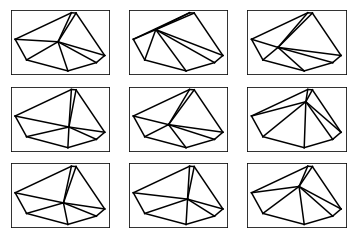

In [7]:
np.random.seed(2)

fig = plt.figure()
#plt.figure(figsize=(12,12))

for k in range(9):

    
    ax = plt.subplot(3,3,k+1)
    plt.xticks(())
    plt.yticks(())
    #plt.scatter(x,y, color='black',s=4)

    #--- Plot contour
    for i in range(len(rad)):
        plt.plot(x[i:i+2],y[i:i+2], color='black')
    plt.plot([x[0],x[len(x)-1]],[y[0],y[len(y)-1]], color='black')

    #--- Connect to center
    xc = np.random.normal(0,1)/4
    yc = np.random.normal(0,1)/4
    for i in range(len(rad)):
        plt.plot([x[i],xc],[y[i],yc], color='black')
#plt.show()
    
fig.savefig('Voronoi_cell_random_samples.pdf',bbox_inches='tight')

In [8]:
#--- Append central point
xc = 0
yc = 0
wc = 0
xt0 = np.append(x,xc)
yt0 = np.append(y,yc)
wt0 = np.append(w,wc)

points = np.zeros((n_p+1,2))
points[:,0] = xt0
points[:,1] = yt0

print(points.shape)
print(wt0.shape)

ori = griddata(points, wt0, (grid_x, grid_y), method='linear')
ori[np.isnan(ori)] = 1  #--- Remove NAN values

n_ens = 128

fin = np.zeros((ng,ng))
ens = np.zeros((n_ens, ng,ng))

for i in range(n_ens):
    xc = np.random.normal(0.0,1.0)/10
    yc = np.random.normal(0.0,1.0)/10
    wc = 0
    xt = np.append(x,xc)
    yt = np.append(y,yc)
    wt = np.append(w,wc)

    points = np.zeros((n_p+1,2))
    points[:,0] = xt
    points[:,1] = yt
    fin_i = griddata(points, wt, (grid_x, grid_y), method='linear')
    fin_i[np.isnan(fin_i)] = 1  #--- Remove NAN values
    fin = fin + fin_i
    
    ens[i,:,:] = fin_i
    
fin = fin / n_ens


(8, 2)
(8,)


In [21]:
def make_plot(n_ens, ng, x,y,w, gauss_scale, filename):
    
    fig = plt.figure()
    
    plt.figure(figsize=(4,4),dpi=120)
    
    fin, ens = make_ensenble(n_ens, ng, x,y,w, gauss_scale)

    #plt.subplot(211)
    plt.imshow(fin.T, origin='lower', cmap='Greys', extent=(-1.2,1.2,-1.2,1.2), vmin=0,vmax=1)
    plt.xticks(())
    plt.yticks(())

    #plt.subplot(212)
    #plt.plot(fin[ng//2,:], linestyle='--', color='black')
    #plt.plot(ori[ng//2,:], color='black')
    #plt.xticks(())
    #plt.yticks(())
    #plt.show()

    fig.savefig(filename)

<Figure size 432x288 with 0 Axes>

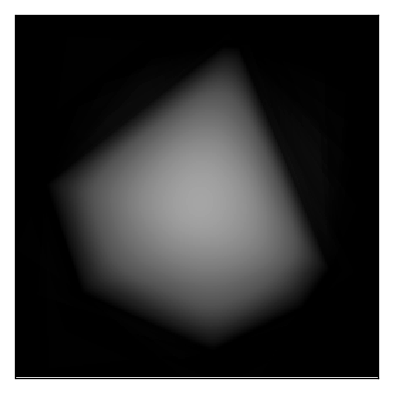

In [25]:
make_plot(n_ens, 256, x,y,w, 2, 'Voronoi_cell-gauss-2.png')

<Figure size 432x288 with 0 Axes>

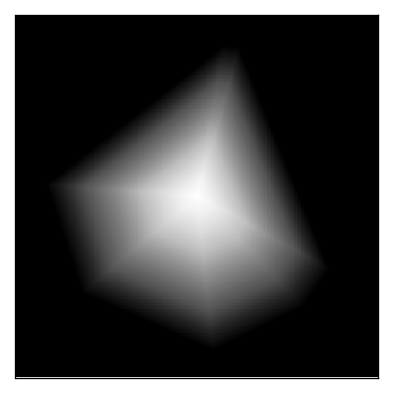

In [27]:

fig = plt.figure()

plt.figure(figsize=(4,4),dpi=120)
plt.xticks(())
plt.yticks(())
plt.imshow(ori.T, origin='lower', cmap='Greys', extent=(-1.2,1.2,-1.2,1.2),vmin=0,vmax=1)
#plt.scatter(xt0,yt0, s=1, color='black')

plt.show()

fig.savefig('Voronoi_cell_original.pdf')
